In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

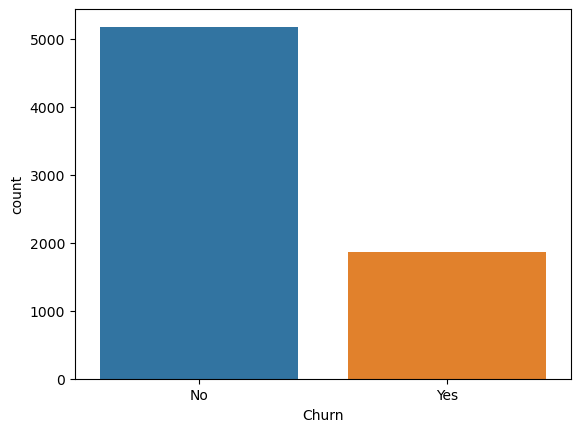

In [8]:
sns.countplot(x='Churn', data=df)
plt.show()

In [9]:
# know what % of customers are leaving
No_retained = df[df.Churn=='No'].shape[0]
No_churn = df[df.Churn=='Yes'].shape[0]
print(No_retained/(No_retained + No_churn) * 100,'% of customers retained')
print(No_churn/(No_retained + No_churn) * 100,'% of customers churned')

73.4630129206304 % of customers retained
26.536987079369588 % of customers churned


<AxesSubplot:xlabel='gender', ylabel='count'>

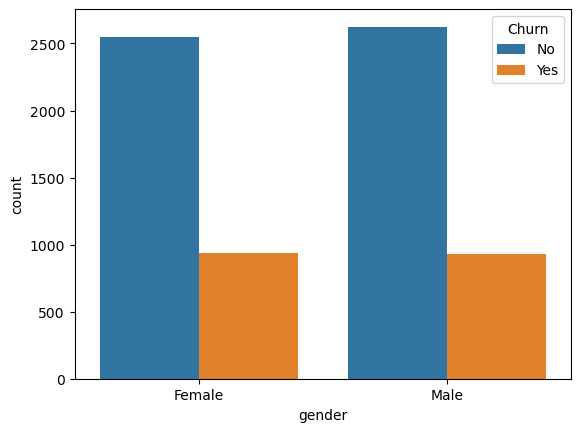

In [10]:
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

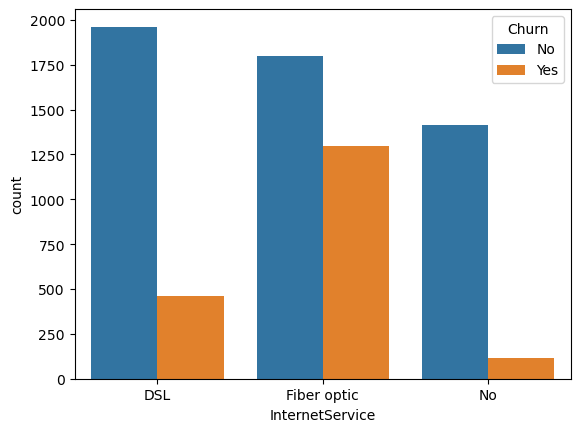

In [11]:
sns.countplot(x='InternetService',hue='Churn', data=df)

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

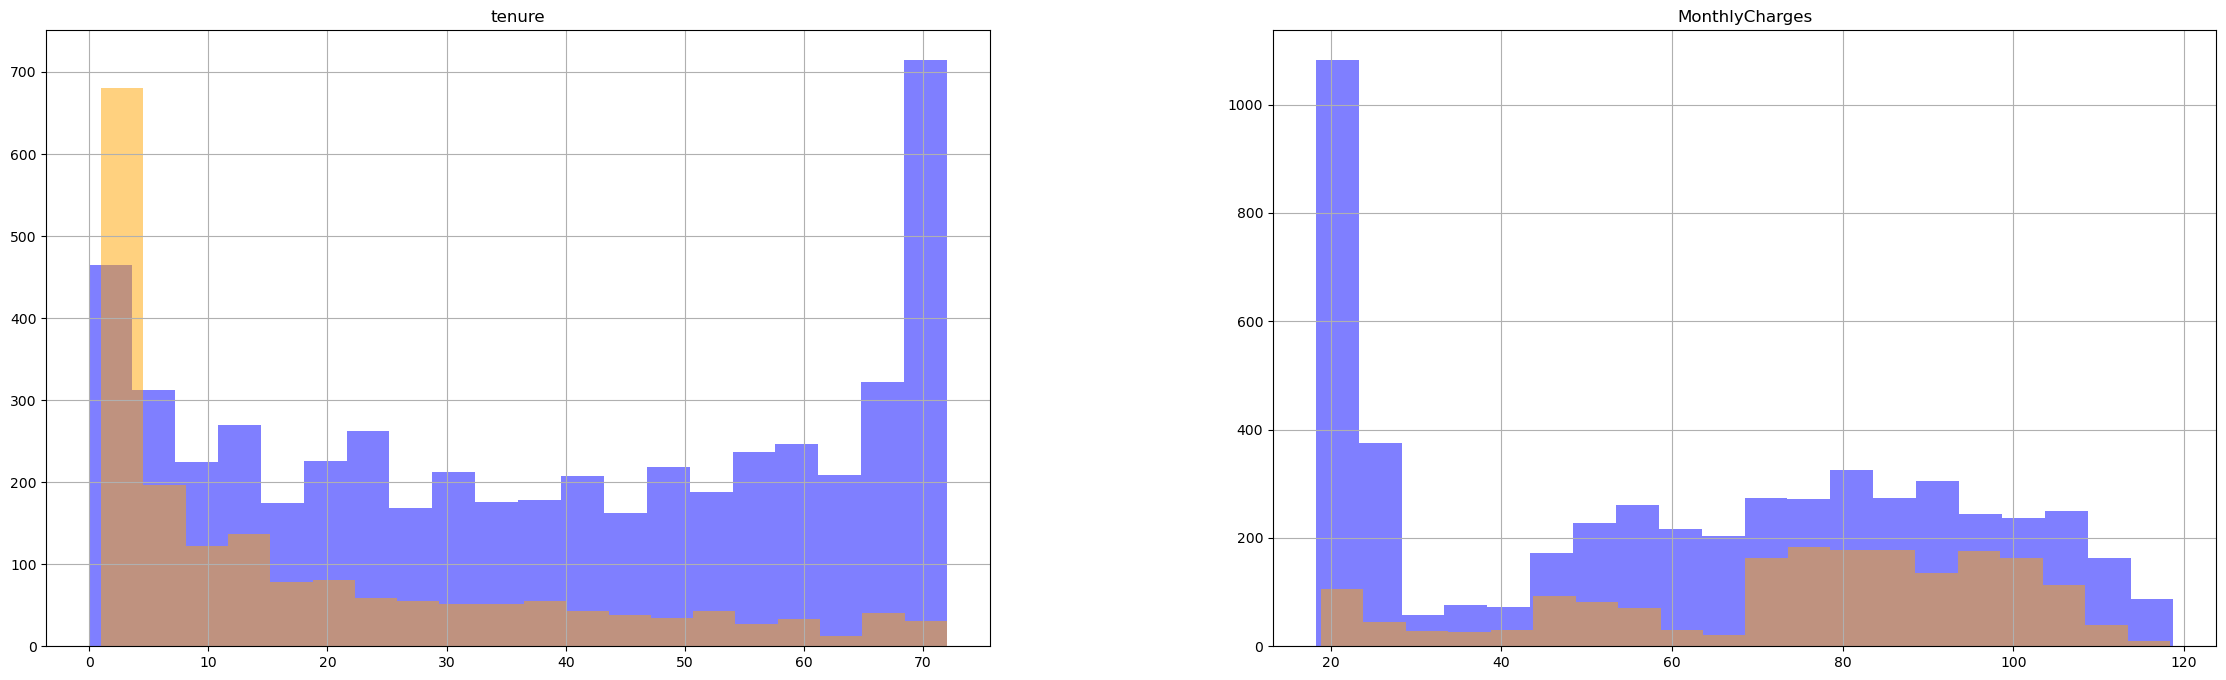

In [12]:
numerical_features = ['tenure','MonthlyCharges']
fig,ax=plt.subplots(1,2,figsize=(28,8))
df[df.Churn =='No'][numerical_features].hist(bins=20,color='blue',alpha=0.5,ax=ax)
df[df.Churn =='Yes'][numerical_features].hist(bins=20,color='orange',alpha=0.5,ax=ax)

In [13]:
# preprocessing- remove unnecessary columns
cln_df = df.drop('customerID',axis=1)

In [14]:
cln_df.shape

(7043, 20)

In [15]:
# convert non numeric columns - numeric
for c in cln_df:
    if np.issubdtype(cln_df[c].dtype, np.number):
        continue
    cln_df[c]=LabelEncoder().fit_transform(cln_df[c])

In [13]:
cln_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [31]:
cln_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [100]:
#scale the data
X=cln_df.drop('Churn',axis=1)
y=cln_df['Churn']
X=StandardScaler().fit_transform(X)

In [101]:
#split data 80% - train, 20% test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [102]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [103]:
predictions = model.predict(x_test)
print(predictions)

[1 0 0 ... 0 0 0]


In [104]:
#check precision, recall, f1-score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# Logistic regression

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * (X.T.dot(h - y))
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
theta_init = np.zeros(X_with_intercept.shape[1])
alpha = 0.01
num_iterations = 1000

theta, cost_history = gradient_descent(X_with_intercept, y, theta_init, alpha, num_iterations)

X_test_with_intercept = np.c_[np.ones((x_test.shape[0], 1)), x_test]
predictions = (sigmoid(X_test_with_intercept.dot(theta)) >= 0.5).astype(int)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.66      0.59      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



# logistic regression with L1 regularization

In [42]:
def compute_cost(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.abs(theta[1:]))
    return cost + reg_term

def gradient_descent(X, y, theta, alpha, lambda_reg, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * (X.T.dot(h - y))
        reg_term = (lambda_reg / m) * np.sign(theta[1:])
        gradient[1:] += reg_term
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta, lambda_reg)
        cost_history.append(cost)

    return theta, cost_history

X_train_with_intercept = np.c_[np.ones((x_train.shape[0], 1)), x_train]
theta_init = np.zeros(X_train_with_intercept.shape[1])
alpha = 0.04
lambda_reg = 0.3
num_iterations = 1000

theta, cost_history = gradient_descent(X_train_with_intercept, y_train, theta_init, alpha, lambda_reg, num_iterations)

X_test_with_intercept = np.c_[np.ones((x_test.shape[0], 1)), x_test]
predictions = (sigmoid(X_test_with_intercept.dot(theta)) >= 0.5).astype(int)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# logistic regression with L2 regularization

In [40]:
def compute_cost(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    reg_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
    return cost + reg_term

def gradient_descent(X, y, theta, alpha, lambda_reg, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * (X.T.dot(h - y))
        reg_term = (lambda_reg / m) * theta[1:]
        gradient[1:] += reg_term
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta, lambda_reg)
        cost_history.append(cost)

    return theta, cost_history

X_train_with_intercept = np.c_[np.ones((x_train.shape[0], 1)), x_train]
theta_init = np.zeros(X_train_with_intercept.shape[1])
alpha = 0.01
lambda_reg = 0.1
num_iterations = 1000

theta, cost_history = gradient_descent(X_train_with_intercept, y_train, theta_init, alpha, lambda_reg, num_iterations)

X_test_with_intercept = np.c_[np.ones((x_test.shape[0], 1)), x_test]
predictions = (sigmoid(X_test_with_intercept.dot(theta)) >= 0.5).astype(int)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.58      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

